### **Fuzzy C-Means Clustering Algorithm**

## <span style="color : green"> Fuzzy C-Means Clustering </span>

# <center> Table of Contents </center>

1. Train a FCM Model and compute the centroids and labels
1. Plot the predicted cluster
1. Train the model for n number of cluster
1. Evalute the clustering approach using partition coefficient and partition entropy coefficient 

In [ ]:
import numpy as np
import pandas as pd
from fcmeans import FCM
from sklearn.model_selection  import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import pearsonr
n_samples=5000

In [ ]:
# Load the dataset and done the pre-processing steps

df =   pd.read_csv("Data.csv")
x=df.iloc[:,[0,6]]
y=df.salary
x_train,y_train,x_test,y_test = train_test_split(x,y,test_size=0.25,random_state=105,shuffle=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Remove the target variable 

c=[]
for i in df.columns[0:-2]:
  for j in df.columns[0:-2]:
    corr,_ = pearsonr(df[i],df[j])
    c.append([i,j,corr])
c=pd.DataFrame(c,columns=['columns1','column2','Correlation'])
c.loc[c.Correlation == c.Correlation.min()]


,columns1,column2,Correlation
6,satisfaction_level,left,-0.388375
48,left,satisfaction_level,-0.388375


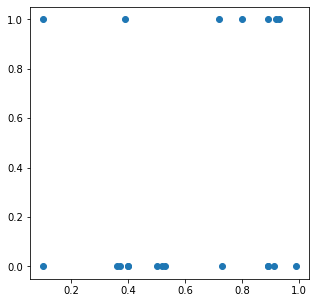

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x_train.iloc[:,0].head(20),y_train.iloc[:,1].head(20),alpha=1)
plt.show()

In [ ]:
x=np.array(x_train)
fcm= FCM(n_clusters=3)
fcm.fit(x)
#outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.predict(x)
fcm_labels
fcm.partition_coefficient

0.270814979429895

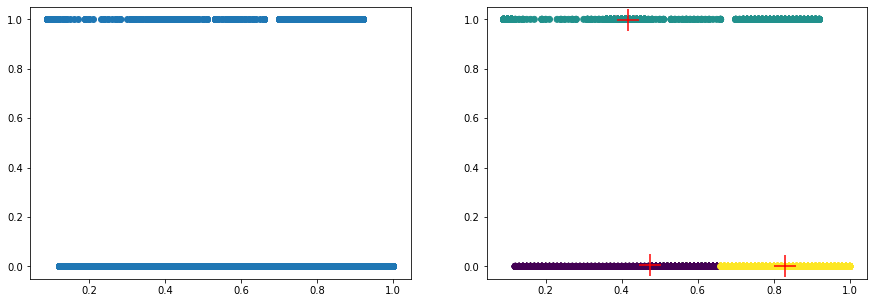

In [ ]:
#plot results
f,axes = plt.subplots(1,2,figsize=(15,5))
axes[0].scatter(x[:,0],x[:,1],alpha=1)
axes[1].scatter(x[:,0],x[:,1],c=fcm_labels,alpha=1)
axes[1].scatter(fcm_centers[:,0],fcm_centers[:,1],marker = "+",s=500,c='r')

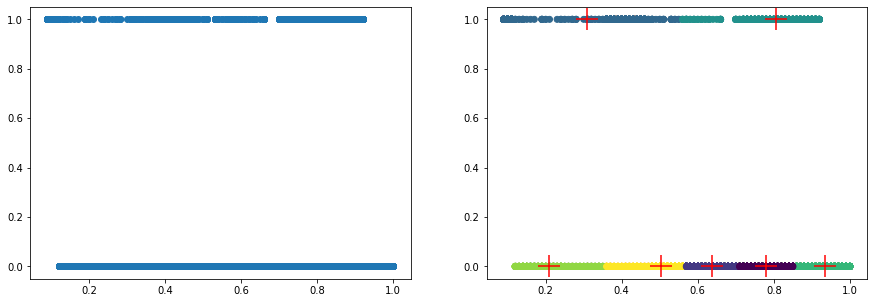

In [ ]:
x=np.array(x_train)
fcm1= FCM(n_clusters=7)
fcm1.fit(x)
#outputs
fcm1_centers = fcm1.centers
fcm1_labels  = fcm1.predict(x)
#plot results
f,axes = plt.subplots(1,2,figsize=(15,5))
axes[0].scatter(x[:,0],x[:,1],alpha=1)
axes[1].scatter(x[:,0],x[:,1],c=fcm1_labels,alpha=1)
axes[1].scatter(fcm1_centers[:,0],fcm1_centers[:,1],marker = "+",s=500,c='r')

In [ ]:
ft=[]
for i in  range(1,20):
    fcm= FCM(n_clusters=i)
    fcm.fit(x)
    m1=fcm.partition_coefficient
    m2=fcm.partition_entropy_coefficient
    ft.append(["N="+str(i),m1,m2])

ftdn=pd.DataFrame(ft,columns=['N_value','partition_coefficient','partition_entropy_coefficient'])
ftdn

,N_value,partition_coefficient,partition_entropy_coefficient
0,N=1,1.000000,-0.000000
1,N=2,0.461548,0.106607
2,N=3,0.270815,0.162798
3,N=4,0.201374,0.135106
4,N=5,0.154080,0.133200
5,N=6,0.131331,0.105221
6,N=7,0.116818,0.078453
7,N=8,0.100072,0.074864
8,N=9,0.088118,0.069276
9,N=10,0.077495,0.068069


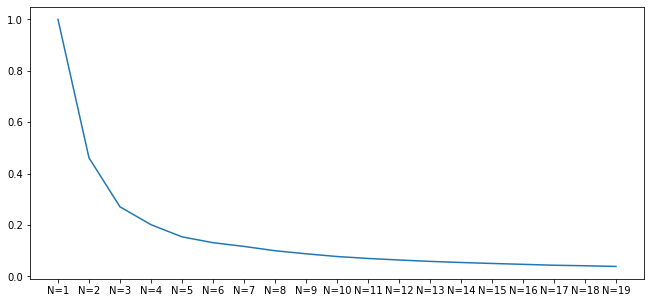

In [ ]:
plt.figure(figsize=(11,5))
plt.plot(ftdn.iloc[:,0],ftdn.iloc[:,1])
plt.show()